In [ ]:
# Titanic Preprocessing Exercises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler


from google.colab import files
uploaded = files.upload()   # <- Ask for upload if running in Colab

df = pd.read_csv("train.csv")
print("Shape:", df.shape)
df.head()


Saving train.csv to train.csv
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Exercise 1

# 1. Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# 2. Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (891, 12)


In [ ]:
# Exercise 2

# 1. Check missing values
print(df.isnull().sum())

# Strategy examples:
# - Drop rows with too many NaN
# - Fill numerical with median
# - Fill categorical with mode

# Example: Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Example: Fill Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Example: Drop Cabin column (too many missing)
df = df.drop(columns=["Cabin"])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Exercise 3

# Family Size = SibSp + Parch + 1 (the passenger)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Extract Title from Name
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.", expand=False)

# Encode Title with LabelEncoder
le = LabelEncoder()
df["Title"] = le.fit_transform(df["Title"])

# One-hot encode Sex
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2047034449.py:7: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.", expand=False)


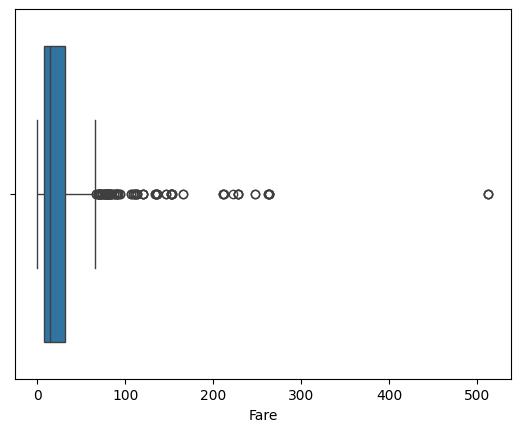

In [ ]:
# Exercise 4

# Boxplot for Fare
sns.boxplot(x=df["Fare"])
plt.show()

# Using IQR method
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Cap outliers
df["Fare"] = np.where(df["Fare"] > upper_bound, upper_bound, df["Fare"])
df["Fare"] = np.where(df["Fare"] < lower_bound, lower_bound, df["Fare"])


In [ ]:
# Exercise 5

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df["Age_std"] = scaler_std.fit_transform(df[["Age"]])
df["Fare_norm"] = scaler_minmax.fit_transform(df[["Fare"]])


In [ ]:
# Exercise 6

# One-hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Label encode Title already done earlier
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  Title  Sex_male   Age_std  \
0         A/5 21171   7.2500           2     12      True -0.565736   
1          PC 17599  65.6344           2     13     False  0.663861   
2  STON/O2. 3101282   7.9250           1      9     False -0.258337   
3            113803  53.1000           2  

In [ ]:
# Exercise 7

# Create age groups
bins = [0, 12, 18, 60, 100]
labels = ["Child", "Teen", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# One-hot encode AgeGroup
df = pd.get_dummies(df, columns=["AgeGroup"], drop_first=True)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  Title  Sex_male   Age_std  \
0         A/5 21171   7.2500           2     12      True -0.565736   
1          PC 17599  65.6344           2     13     False  0.663861   
2  STON/O2. 3101282   7.9250           1      9     False -0.258337   
3            113803  53.1000           2  